In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from neuralprophet import NeuralProphet

OSError: [WinError 127] The specified procedure could not be found. Error loading "c:\Users\Nilotpal.Choudhury\AppData\Local\miniforge3\envs\tsnp_env\Lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [46]:
import os

# Construct the relative path
relative_path = os.path.join('forecastprices', 'data', 'traindata.csv')

# Read the CSV file using the relative path
trainingdata = pd.read_csv(relative_path)

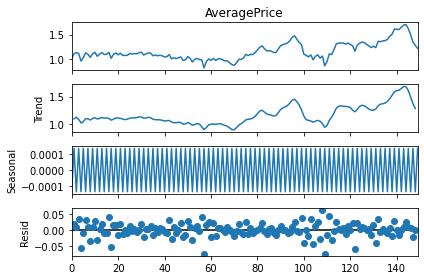

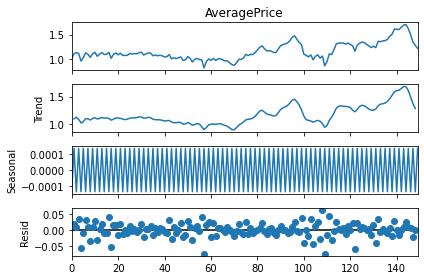

In [47]:
# review the seasonality period using additive and multiple trends

from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(trainingdata['AveragePrice'], model='additive', period=2)
additive_decomposition.plot()

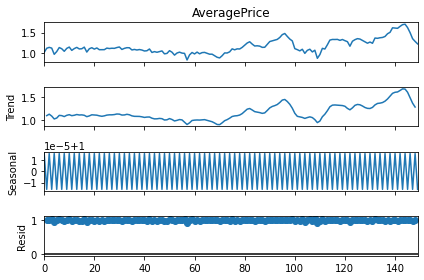

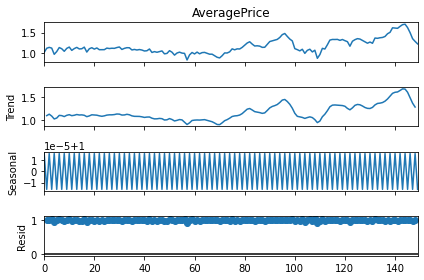

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(trainingdata['AveragePrice'], model='multiplicative', period=2)
multiplicative_decomposition.plot()

In [49]:
# estimate the d value using the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(trainingdata['AveragePrice(-1)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.377105
p-value: 0.000326
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


In [50]:
# estimate the d value using the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
plottingdata = trainingdata.dropna(axis=0)
result = adfuller(plottingdata['AveragePrice(-2)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.690226
p-value: 0.000088
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


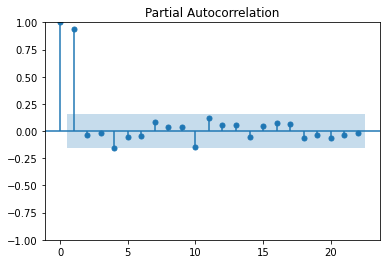

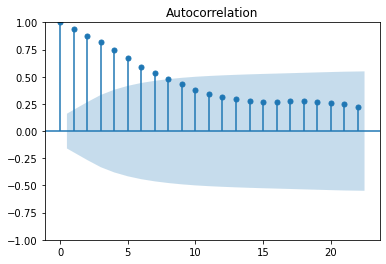

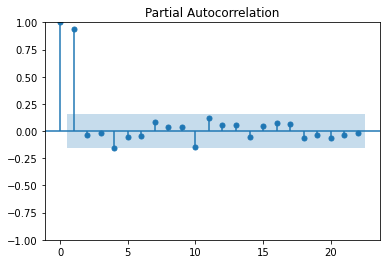

In [51]:
# Plot ACG and PACF plots to estimate the p and q values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(trainingdata['AveragePrice'],)
plot_pacf(trainingdata['AveragePrice']) 

In [52]:
# use auto-arima to determine p, d, q values
from pmdarima import auto_arima
stepwise_model = auto_arima(trainingdata['AveragePrice'], start_p=1, start_q=0,
                           max_p=3, max_q=7, m=2,
                           seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=False, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(1,1,1)[2]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[2]             : AIC=-301.398, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[2]             : AIC=-340.568, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[2]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[2]             : AIC=-299.760, Time=0.03 sec


c:\Users\Nilotpal.Choudhury\AppData\Local\miniforge3\envs\ds_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,0)(2,1,0)[2]             : AIC=-351.274, Time=0.07 sec
 ARIMA(1,1,0)(2,1,1)[2]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[2]             : AIC=-353.243, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[2]             : AIC=-341.956, Time=0.02 sec
 ARIMA(0,1,0)(2,1,1)[2]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(1,1,1)[2]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(2,1,0)[2]             : AIC=-351.279, Time=0.08 sec
 ARIMA(1,1,1)(2,1,0)[2]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[2] intercept   : AIC=-351.454, Time=0.09 sec

Best model:  ARIMA(0,1,0)(2,1,0)[2]          
Total fit time: 1.451 seconds
-353.24250331488605


c:\Users\Nilotpal.Choudhury\AppData\Local\miniforge3\envs\ds_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
